<div class="alert alert-block alert-success">
    <font color='darkcyan' style='font-family:calibri'>
    <h1>
        Eddie L - Final Project
    </h1>
    </font>
    </div>

<font color='darkcyan' style='font-family:calibri'>
    <h2>
        The Question
    </h2>
    <p>
        

For my final project, I want to use the Spotify API to see if the numerical data that each song on a playlist contains is representative of the mood that the playlist is trying to convey.
<br/><br/>
I guess what I want to ask can also be rephrased as "Is music a truly subjective experience?"
<br/><br/>
With evaluating music, there is the problem of human subjectivity to what feelings a song can evoke.
<br/>
I have a lot of playlists that are separated into what moods those songs create. I want to see the trends in my music taste to determine if the songs that make me feel sad/chill/upbeat are actually as sad/chill/upbeat as I perceive them to be.
<br/>
If my feelings are faithful to the actual data in the songs, then there should be 4 different noticeable clusters of data points on my graph, each point with distinct features of the mood of the playlist. (example: chill - high valence/low energy, sad - low valence/low energy, happy - high valence/high energy, etc)

<font color='darkcyan' style='font-family:calibri'>
    <h2>
        Part 1 - Accessing the API
    </h2>
    <p>
        In order to get this project started, we need to begin by establishing our access to the spotify API.
    </p>
</font>

In [3]:
import pandas as pd
import json
import base64
import requests
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

<font color='darkcyan' style='font-family:calibri'>
    <p>
        Reading in my keys, formatting them for an application for developer access.
    </p>
</font>

In [4]:
keys = pd.read_csv("Spotify_Keys_10-18.txt", header = 0, sep = ",")
appid = keys['Client_ID'][0]
appsecret = keys['Client_Secret'][0]
client_cred = base64.b64encode(str(appid + ":" + appsecret).encode('ascii'))

<font color='darkcyan' style='font-family:calibri'>
    <p>
        Creating a session header to connect to the client.
    </p>
</font>

In [5]:
header = {'Authorization': 'Basic {}'.format(client_cred.decode('ascii'))}

In [6]:
payload = {'grant_type' : 'client_credentials'}
access_token_url = "https://accounts.spotify.com/api/token"

In [7]:
response = requests.post(access_token_url, headers = header, data = payload)

<font color='darkcyan' style='font-family:calibri'>
    <p>
        Acquiring the token for the session.
    </p>
</font>

In [8]:
session_token = response.json()['access_token']
session_header = {'Authorization': 'Bearer {}'.format(response.json()['access_token'])}

<font color='darkcyan' style='font-family:calibri'>
    <h2>
        Part 2 - Getting the Data
    </h2>
    <p>
        For the next step, I need to get my hands on the data for all four of my playlists.
        <br />
    </p>
        <p>
        I have four playlists with different moods. I have determined these four moods to be "moody", "angsty", "chill", and "upbeat".
        <br />
        I aim to get the URI for each playlist, and then use list comprehension in order to get the tracks ids for each track in every playlist.
        <br />
        After that is done, I will get the audio features for each track, and use that data to construct a data frame.
    </p>
</font>

In [9]:
moody_id = '7sbBcRu6BlRhe94XLqcke5'
moody_tracks_endpoint = "https://api.spotify.com/v1/playlists/{}/tracks".format(moody_id)
moody_tracks = requests.get(moody_tracks_endpoint, headers = session_header)
moody_dict = json.loads(moody_tracks.text)
moody_track_ids = [x['track']['id'] for x in moody_dict['items']]
moody_track_strings = ','.join(str(x) for x in moody_track_ids)
moody_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(moody_track_strings)
moody_features = requests.get(moody_features_endpoint, headers = session_header)
moody_features_dict = json.loads(moody_features.text)
moody_features_df = pd.DataFrame(moody_features_dict['audio_features'])
moody_features_df['playlist_mood'] = ['moody'] * len(moody_features_df.index)

<font color='darkcyan' style='font-family:calibri'>
    <p>
        "Moody" playlist audio features data frame is done. I've added a column to this data frame so that it is clear which tracks are from which playlist.
    </p>
</font>

In [10]:
moody_features_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,playlist_mood
0,0.476,0.3260,9,-9.597,1,0.0296,0.098200,0.228000,0.3300,0.1730,137.963,audio_features,5LnFURDZ1n3psF1IhjKkfe,spotify:track:5LnFURDZ1n3psF1IhjKkfe,https://api.spotify.com/v1/tracks/5LnFURDZ1n3p...,https://api.spotify.com/v1/audio-analysis/5LnF...,970465,4,moody
1,0.344,0.1650,5,-16.810,1,0.0387,0.798000,0.086100,0.1060,0.0700,119.656,audio_features,2k1uDTFNfEg1sO6e8ca7rp,spotify:track:2k1uDTFNfEg1sO6e8ca7rp,https://api.spotify.com/v1/tracks/2k1uDTFNfEg1...,https://api.spotify.com/v1/audio-analysis/2k1u...,218173,4,moody
2,0.552,0.7550,9,-5.263,1,0.0415,0.776000,0.000003,0.0863,0.4820,129.995,audio_features,2QxUePxZqeoBynXxt093Ts,spotify:track:2QxUePxZqeoBynXxt093Ts,https://api.spotify.com/v1/tracks/2QxUePxZqeoB...,https://api.spotify.com/v1/audio-analysis/2QxU...,195038,4,moody
3,0.537,0.6460,5,-12.909,1,0.0340,0.587000,0.000000,0.0640,0.7720,170.012,audio_features,4Zfiia10nj9oj6qVqNc63Q,spotify:track:4Zfiia10nj9oj6qVqNc63Q,https://api.spotify.com/v1/tracks/4Zfiia10nj9o...,https://api.spotify.com/v1/audio-analysis/4Zfi...,107389,4,moody
4,0.580,0.7910,11,-7.604,0,0.3240,0.196000,0.003260,0.0793,0.3430,83.323,audio_features,3vFZheR74pxUkzxqhXTZ2X,spotify:track:3vFZheR74pxUkzxqhXTZ2X,https://api.spotify.com/v1/tracks/3vFZheR74pxU...,https://api.spotify.com/v1/audio-analysis/3vFZ...,222107,4,moody
5,0.518,0.3500,0,-9.298,1,0.0319,0.801000,0.000000,0.1200,0.4000,142.173,audio_features,13Zjl9fmj2k9npeD0Pdawt,spotify:track:13Zjl9fmj2k9npeD0Pdawt,https://api.spotify.com/v1/tracks/13Zjl9fmj2k9...,https://api.spotify.com/v1/audio-analysis/13Zj...,235650,4,moody
6,0.237,0.6970,10,-10.192,1,0.0648,0.000025,0.613000,0.1470,0.6860,173.057,audio_features,0cAzBiq0VXMBT7XVuq6XVv,spotify:track:0cAzBiq0VXMBT7XVuq6XVv,https://api.spotify.com/v1/tracks/0cAzBiq0VXMB...,https://api.spotify.com/v1/audio-analysis/0cAz...,221426,4,moody
7,0.508,0.4170,10,-9.632,1,0.0296,0.770000,0.092800,0.0887,0.4830,134.944,audio_features,21uFPefbgeR3QLVJWATlrr,spotify:track:21uFPefbgeR3QLVJWATlrr,https://api.spotify.com/v1/tracks/21uFPefbgeR3...,https://api.spotify.com/v1/audio-analysis/21uF...,305001,4,moody
8,0.255,0.3930,5,-10.654,1,0.0278,0.057700,0.003610,0.1130,0.1180,76.426,audio_features,10nyNJ6zNy2YVYLrcwLccB,spotify:track:10nyNJ6zNy2YVYLrcwLccB,https://api.spotify.com/v1/tracks/10nyNJ6zNy2Y...,https://api.spotify.com/v1/audio-analysis/10ny...,229120,4,moody
9,0.468,0.8380,6,-5.756,0,0.0433,0.000094,0.196000,0.0896,0.2590,115.812,audio_features,6xWbpC8KpcItoGd8ZOKJlU,spotify:track:6xWbpC8KpcItoGd8ZOKJlU,https://api.spotify.com/v1/tracks/6xWbpC8KpcIt...,https://api.spotify.com/v1/audio-analysis/6xWb...,274783,4,moody


In [11]:
angsty_id = '6QkLBeAeAez92c76hU96nO'
angsty_tracks_endpoint = "https://api.spotify.com/v1/playlists/{}/tracks".format(angsty_id)
angsty_tracks = requests.get(angsty_tracks_endpoint, headers = session_header)
angsty_dict = json.loads(angsty_tracks.text)
angsty_track_ids = [x['track']['id'] for x in angsty_dict['items']]
angsty_track_strings = ','.join(str(x) for x in angsty_track_ids)
angsty_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(angsty_track_strings)
angsty_features = requests.get(angsty_features_endpoint, headers = session_header)
angsty_features_dict = json.loads(angsty_features.text)
angsty_features_df = pd.DataFrame(angsty_features_dict['audio_features'])
angsty_features_df['playlist_mood'] = ['angsty'] * len(angsty_features_df.index)

<font color='darkcyan' style='font-family:calibri'>
    <p>
        "Angsty" playlist audio features data frame is done. I've added a column to this data frame so that it is clear which tracks are from which playlist.
    </p>
</font>

In [12]:
angsty_features_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,playlist_mood
0,0.705,0.821,9,-5.362,1,0.0354,0.017300,0.000001,0.0831,0.744,135.020,audio_features,2bbpITIIT5QAisXXQ22emV,spotify:track:2bbpITIIT5QAisXXQ22emV,https://api.spotify.com/v1/tracks/2bbpITIIT5QA...,https://api.spotify.com/v1/audio-analysis/2bbp...,258800,4,angsty
1,0.448,0.952,10,-3.477,1,0.0803,0.000603,0.001450,0.1090,0.489,152.958,audio_features,5UwGMbEKlvXFj7DXI1d0P1,spotify:track:5UwGMbEKlvXFj7DXI1d0P1,https://api.spotify.com/v1/tracks/5UwGMbEKlvXF...,https://api.spotify.com/v1/audio-analysis/5UwG...,195160,4,angsty
2,0.466,0.736,0,-7.423,1,0.3580,0.194000,0.000000,0.6820,0.499,78.990,audio_features,0uSwAqfR6cBDj5BRP6L3Vx,spotify:track:0uSwAqfR6cBDj5BRP6L3Vx,https://api.spotify.com/v1/tracks/0uSwAqfR6cBD...,https://api.spotify.com/v1/audio-analysis/0uSw...,160440,4,angsty
3,0.596,0.667,2,-5.417,1,0.0301,0.021800,0.000002,0.1650,0.104,103.965,audio_features,6k7H7hhHyg3DmWdF2fDptt,spotify:track:6k7H7hhHyg3DmWdF2fDptt,https://api.spotify.com/v1/tracks/6k7H7hhHyg3D...,https://api.spotify.com/v1/audio-analysis/6k7H...,248383,3,angsty
4,0.541,0.864,6,-4.267,1,0.0618,0.003670,0.000002,0.2330,0.368,112.934,audio_features,2XeLepvj7gSvKwXtiAwrKa,spotify:track:2XeLepvj7gSvKwXtiAwrKa,https://api.spotify.com/v1/tracks/2XeLepvj7gSv...,https://api.spotify.com/v1/audio-analysis/2XeL...,202613,4,angsty
5,0.480,0.915,2,-3.062,1,0.1070,0.028300,0.000000,0.2020,0.718,158.151,audio_features,6BeihvIy2Gd6f9alja0mRt,spotify:track:6BeihvIy2Gd6f9alja0mRt,https://api.spotify.com/v1/tracks/6BeihvIy2Gd6...,https://api.spotify.com/v1/audio-analysis/6Bei...,234573,4,angsty
6,0.296,0.494,6,-10.490,1,0.0370,0.071500,0.050700,0.1080,0.175,163.669,audio_features,4yXKLDrHYrffSVmQOFdbDA,spotify:track:4yXKLDrHYrffSVmQOFdbDA,https://api.spotify.com/v1/tracks/4yXKLDrHYrff...,https://api.spotify.com/v1/audio-analysis/4yXK...,239598,3,angsty
7,0.353,0.749,1,-9.339,1,0.0411,0.092600,0.000553,0.1660,0.574,85.983,audio_features,19aUuDd6udp1ACNo9t3IuZ,spotify:track:19aUuDd6udp1ACNo9t3IuZ,https://api.spotify.com/v1/tracks/19aUuDd6udp1...,https://api.spotify.com/v1/audio-analysis/19aU...,276000,4,angsty
8,0.337,0.848,4,-5.772,1,0.0995,0.004390,0.000625,0.1090,0.137,89.715,audio_features,0bAkkBIkxlCeRG10umihxS,spotify:track:0bAkkBIkxlCeRG10umihxS,https://api.spotify.com/v1/tracks/0bAkkBIkxlCe...,https://api.spotify.com/v1/audio-analysis/0bAk...,189432,4,angsty
9,0.408,0.768,4,-5.506,1,0.0552,0.012700,0.000001,0.1310,0.441,83.598,audio_features,62O4kLoFoWtXDIQhdrxXk5,spotify:track:62O4kLoFoWtXDIQhdrxXk5,https://api.spotify.com/v1/tracks/62O4kLoFoWtX...,https://api.spotify.com/v1/audio-analysis/62O4...,197777,4,angsty


In [13]:
chill_id = '70UVB6lKm5vkIbMCXvF7c6'
chill_tracks_endpoint = "https://api.spotify.com/v1/playlists/{}/tracks".format(chill_id)
chill_tracks = requests.get(chill_tracks_endpoint, headers = session_header)
chill_dict = json.loads(chill_tracks.text)
chill_track_ids = [x['track']['id'] for x in chill_dict['items']]
chill_track_strings = ','.join(str(x) for x in chill_track_ids)
chill_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(chill_track_strings)
chill_features = requests.get(chill_features_endpoint, headers = session_header)
chill_features_dict = json.loads(chill_features.text)
chill_features_df = pd.DataFrame(chill_features_dict['audio_features'])
chill_features_df['playlist_mood'] = ['chill'] * len(chill_features_df.index)

<font color='darkcyan' style='font-family:calibri'>
    <p>
        "Chill" playlist audio features data frame is done. I've added a column to this data frame so that it is clear which tracks are from which playlist.
    </p>
</font>

In [14]:
chill_features_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,playlist_mood
0,0.629,0.8760,0,-10.141,1,0.0444,0.086400,0.000077,0.0431,0.358,118.010,audio_features,48p5E25cFPanxuwCTmTpuL,spotify:track:48p5E25cFPanxuwCTmTpuL,https://api.spotify.com/v1/tracks/48p5E25cFPan...,https://api.spotify.com/v1/audio-analysis/48p5...,220960,4,chill
1,0.409,0.3990,7,-10.456,1,0.0275,0.763000,0.654000,0.1120,0.161,142.823,audio_features,0Qr61NXlyAeQaADO5xn3rI,spotify:track:0Qr61NXlyAeQaADO5xn3rI,https://api.spotify.com/v1/tracks/0Qr61NXlyAeQ...,https://api.spotify.com/v1/audio-analysis/0Qr6...,256800,4,chill
2,0.425,0.3630,2,-15.320,1,0.0322,0.448000,0.321000,0.0685,0.120,100.426,audio_features,2xfRDWDKOisEXgRnYI58Tb,spotify:track:2xfRDWDKOisEXgRnYI58Tb,https://api.spotify.com/v1/tracks/2xfRDWDKOisE...,https://api.spotify.com/v1/audio-analysis/2xfR...,206000,4,chill
3,0.237,0.4120,4,-11.384,1,0.0299,0.041700,0.451000,0.1070,0.364,186.955,audio_features,73ROvjXlrsrDcNmCurwWOF,spotify:track:73ROvjXlrsrDcNmCurwWOF,https://api.spotify.com/v1/tracks/73ROvjXlrsrD...,https://api.spotify.com/v1/audio-analysis/73RO...,303297,4,chill
4,0.448,0.5110,6,-9.084,1,0.0274,0.362000,0.823000,0.1290,0.112,96.321,audio_features,3VSYkAf6f46i5ZkXOHORq1,spotify:track:3VSYkAf6f46i5ZkXOHORq1,https://api.spotify.com/v1/tracks/3VSYkAf6f46i...,https://api.spotify.com/v1/audio-analysis/3VSY...,291640,4,chill
5,0.480,0.4880,4,-11.103,1,0.0245,0.099000,0.087900,0.1020,0.275,90.349,audio_features,7laJx5tDtvm3Mkj832oxSb,spotify:track:7laJx5tDtvm3Mkj832oxSb,https://api.spotify.com/v1/tracks/7laJx5tDtvm3...,https://api.spotify.com/v1/audio-analysis/7laJ...,225767,4,chill
6,0.574,0.4690,4,-8.209,1,0.0254,0.534000,0.000092,0.1280,0.288,132.023,audio_features,78Sw5GDo6AlGwTwanjXbGh,spotify:track:78Sw5GDo6AlGwTwanjXbGh,https://api.spotify.com/v1/tracks/78Sw5GDo6AlG...,https://api.spotify.com/v1/audio-analysis/78Sw...,242485,4,chill
7,0.503,0.5260,5,-10.113,1,0.1830,0.316000,0.000022,0.2740,0.627,159.509,audio_features,7H9A6wQICgckNiQCCTzqQ2,spotify:track:7H9A6wQICgckNiQCCTzqQ2,https://api.spotify.com/v1/tracks/7H9A6wQICgck...,https://api.spotify.com/v1/audio-analysis/7H9A...,233564,4,chill
8,0.589,0.7160,0,-7.944,1,0.0563,0.202000,0.000034,0.0711,0.408,89.969,audio_features,4KKAVfbXHsBbU6j11TJ29O,spotify:track:4KKAVfbXHsBbU6j11TJ29O,https://api.spotify.com/v1/tracks/4KKAVfbXHsBb...,https://api.spotify.com/v1/audio-analysis/4KKA...,223987,4,chill
9,0.492,0.5680,6,-8.535,1,0.0480,0.628000,0.021300,0.0960,0.682,139.952,audio_features,4XV1DjAjdXm1vVjoFaFkrN,spotify:track:4XV1DjAjdXm1vVjoFaFkrN,https://api.spotify.com/v1/tracks/4XV1DjAjdXm1...,https://api.spotify.com/v1/audio-analysis/4XV1...,228733,4,chill


In [15]:
upbeat_id = '76O8fpzwUQqUdGbtTJhOmJ'
upbeat_tracks_endpoint = "https://api.spotify.com/v1/playlists/{}/tracks".format(upbeat_id)
upbeat_tracks = requests.get(upbeat_tracks_endpoint, headers = session_header)
upbeat_dict = json.loads(upbeat_tracks.text)
upbeat_track_ids = [x['track']['id'] for x in upbeat_dict['items']]
upbeat_track_strings = ','.join(str(x) for x in upbeat_track_ids)
upbeat_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(upbeat_track_strings)
upbeat_features = requests.get(upbeat_features_endpoint, headers = session_header)
upbeat_features_dict = json.loads(upbeat_features.text)
upbeat_features_df = pd.DataFrame(upbeat_features_dict['audio_features'])
upbeat_features_df['playlist_mood'] = ['upbeat'] * len(upbeat_features_df.index)

<font color='darkcyan' style='font-family:calibri'>
    <p>
        "Upbeat" playlist audio features data frame is done. I've added a column to this data frame so that it is clear which tracks are from which playlist.
    </p>
</font>

In [16]:
upbeat_features_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,playlist_mood
0,0.593,0.958,7,-4.697,1,0.0480,0.003470,0.000013,0.1010,0.378,110.979,audio_features,0lgiIwUU7Y10uXfKkgXdjk,spotify:track:0lgiIwUU7Y10uXfKkgXdjk,https://api.spotify.com/v1/tracks/0lgiIwUU7Y10...,https://api.spotify.com/v1/audio-analysis/0lgi...,218055,4,upbeat
1,0.572,0.935,11,-3.991,1,0.0434,0.000340,0.000004,0.2090,0.655,112.034,audio_features,1gXAB8LVnrNFVkj4kBdaSE,spotify:track:1gXAB8LVnrNFVkj4kBdaSE,https://api.spotify.com/v1/tracks/1gXAB8LVnrNF...,https://api.spotify.com/v1/audio-analysis/1gXA...,220696,4,upbeat
2,0.633,0.836,3,-3.655,1,0.0498,0.005010,0.000001,0.1890,0.464,117.989,audio_features,0LACZ5yc1B7U7CIrVcJ6Fe,spotify:track:0LACZ5yc1B7U7CIrVcJ6Fe,https://api.spotify.com/v1/tracks/0LACZ5yc1B7U...,https://api.spotify.com/v1/audio-analysis/0LAC...,178590,4,upbeat
3,0.561,0.902,1,-3.409,1,0.1030,0.043800,0.000000,0.0965,0.754,159.937,audio_features,0OoT7JehdxGaaUmjDVknik,spotify:track:0OoT7JehdxGaaUmjDVknik,https://api.spotify.com/v1/tracks/0OoT7JehdxGa...,https://api.spotify.com/v1/audio-analysis/0OoT...,184787,4,upbeat
4,0.486,0.936,1,-2.957,1,0.0546,0.002270,0.000033,0.1680,0.551,101.993,audio_features,66Aox16AXYiqZum37rTDRG,spotify:track:66Aox16AXYiqZum37rTDRG,https://api.spotify.com/v1/tracks/66Aox16AXYiq...,https://api.spotify.com/v1/audio-analysis/66Ao...,177853,4,upbeat
5,0.537,0.937,8,-4.247,1,0.0773,0.000990,0.000000,0.1310,0.659,141.967,audio_features,6zyiL6tzDV2fUCIcTccymv,spotify:track:6zyiL6tzDV2fUCIcTccymv,https://api.spotify.com/v1/tracks/6zyiL6tzDV2f...,https://api.spotify.com/v1/audio-analysis/6zyi...,213726,4,upbeat
6,0.652,0.934,0,-3.531,0,0.0383,0.000929,0.000000,0.1040,0.706,147.950,audio_features,32uZjoJA2Mm7Xf6Yonsk3q,spotify:track:32uZjoJA2Mm7Xf6Yonsk3q,https://api.spotify.com/v1/tracks/32uZjoJA2Mm7...,https://api.spotify.com/v1/audio-analysis/32uZ...,188845,4,upbeat
7,0.664,0.733,7,-4.545,0,0.1210,0.205000,0.000000,0.0287,0.510,75.520,audio_features,264G5vkMj5rKz5U1Cln4pW,spotify:track:264G5vkMj5rKz5U1Cln4pW,https://api.spotify.com/v1/tracks/264G5vkMj5rK...,https://api.spotify.com/v1/audio-analysis/264G...,233091,4,upbeat
8,0.614,0.808,9,-5.205,1,0.0288,0.002540,0.138000,0.3280,0.484,141.055,audio_features,5ca6pgm6DETfHfEAyJyjIL,spotify:track:5ca6pgm6DETfHfEAyJyjIL,https://api.spotify.com/v1/tracks/5ca6pgm6DETf...,https://api.spotify.com/v1/audio-analysis/5ca6...,185757,4,upbeat
9,0.621,0.853,8,-4.707,1,0.0392,0.146000,0.000000,0.1210,0.905,124.019,audio_features,602KGoMhDTkGeMewz5kgZ7,spotify:track:602KGoMhDTkGeMewz5kgZ7,https://api.spotify.com/v1/tracks/602KGoMhDTkG...,https://api.spotify.com/v1/audio-analysis/602K...,146982,4,upbeat


<font color='darkcyan' style='font-family:calibri'>
    <h2>
        Part 3 - Exporting the Data
    </h2>
    <p>
        Currently, we just have four separate data frames. This isn't bad, but for the purpose of my analysis, I want to be able to compare the features of all the tracks throughout the four playlists.
        <br />
        I will simply concatenate the data frames to make one "master" data frame out of them. The "playlist_mood" column I made in each data frame will be the key differentiating feature between all of the tracks when it comes to analyzing their values.
    </p>
</font>

In [17]:
playlists_features_master = pd.concat([moody_features_df, angsty_features_df, chill_features_df, upbeat_features_df])

<font color='darkcyan' style='font-family:calibri'>
    <p>
        Exporting data frame to a .csv file.
    </p>

In [18]:
playlists_features_master.to_csv('playlists_features_master.csv')

<font color='darkcyan' style='font-family:calibri'>
    <h2>
        Part 4 - Choosing our Data
    </h2>
    <p>
        At this point, I still don't know exactly what pieces of the data I want to get a better look at. In order to come up with an Analysis Plan, I need to determine what my defining features are between the tracks on these four playlists. 
    </p>
</font>

<font color='darkcyan' style='font-family:calibri'>
    <p>
        I could just roll with a couple values of my choice on a whim, but I want this to be a proper data-driven analysis.
        <br />
        I think the best way to go about this is to get a look at every single attribute that each track has, and then choose the values that are the most distinctive of each category from the graphs. 
    </p>

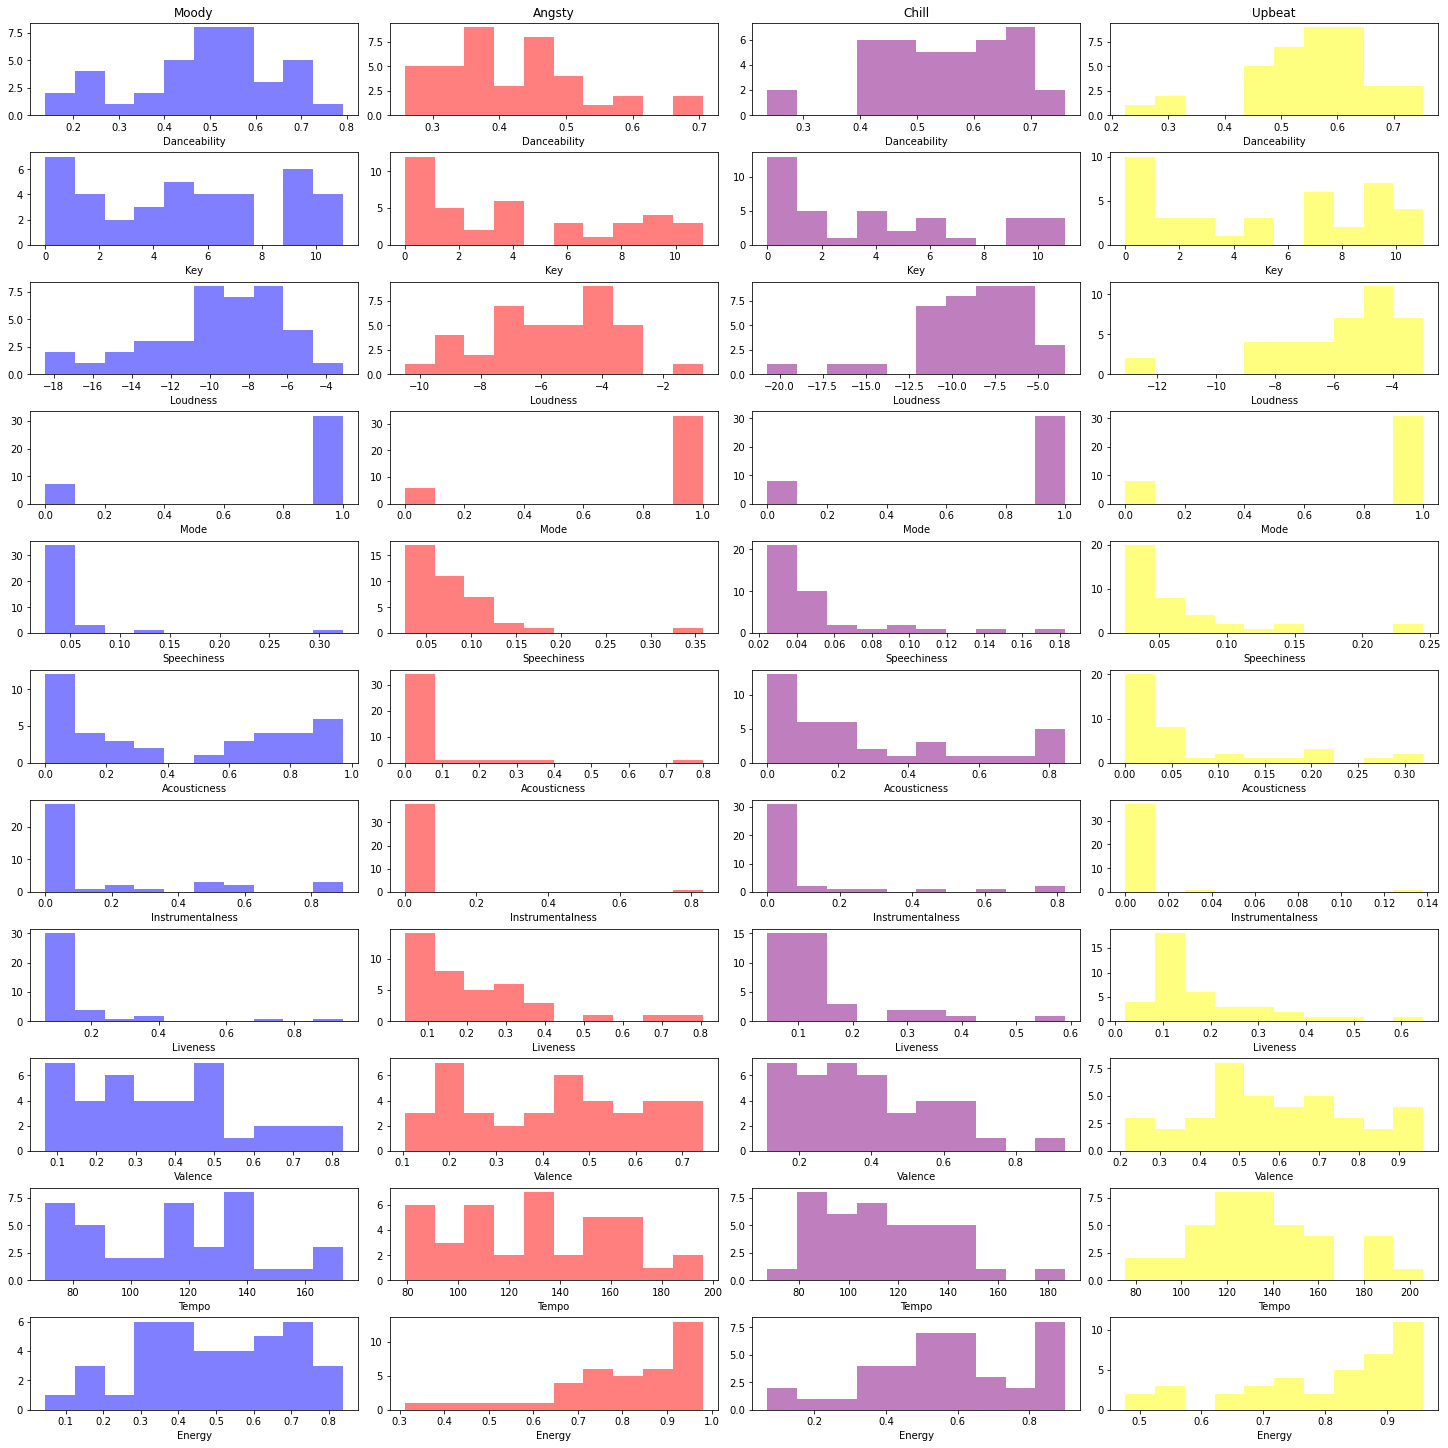

In [35]:
fig1, ax1 = plt.subplots(11, 4, layout = 'constrained', figsize = (20, 20))
ax1[0,0].title.set_text('Moody')
ax1[0,1].title.set_text('Angsty')
ax1[0,2].title.set_text('Chill')
ax1[0,3].title.set_text('Upbeat')
ax1[0,0].set_xlabel('Danceability')
ax1[0,1].set_xlabel('Danceability')
ax1[0,2].set_xlabel('Danceability')
ax1[0,3].set_xlabel('Danceability')
ax1[0, 0].hist(moody_features_df['danceability'], color = "blue", alpha = .5)
ax1[0, 1].hist(angsty_features_df['danceability'], color = "red", alpha = .5)
ax1[0, 2].hist(chill_features_df['danceability'], color = "purple", alpha = .5)
ax1[0, 3].hist(upbeat_features_df['danceability'], color = "yellow", alpha = .5)

ax1[1, 0].set_xlabel("Key")
ax1[1, 1].set_xlabel("Key")
ax1[1, 2].set_xlabel("Key")
ax1[1, 3].set_xlabel("Key")
ax1[1, 0].hist(moody_features_df['key'], color = "blue", alpha = .5)
ax1[1, 1].hist(angsty_features_df['key'], color = "red", alpha = .5)
ax1[1, 2].hist(chill_features_df['key'], color = "purple", alpha = .5)
ax1[1, 3].hist(upbeat_features_df['key'], color = "yellow", alpha = .5)

ax1[2, 0].set_xlabel("Loudness")
ax1[2, 1].set_xlabel("Loudness")
ax1[2, 2].set_xlabel("Loudness")
ax1[2, 3].set_xlabel("Loudness")
ax1[2, 0].hist(moody_features_df['loudness'], color = "blue", alpha = .5)
ax1[2, 1].hist(angsty_features_df['loudness'], color = "red", alpha = .5)
ax1[2, 2].hist(chill_features_df['loudness'], color = "purple", alpha = .5)
ax1[2, 3].hist(upbeat_features_df['loudness'], color = "yellow", alpha = .5)

ax1[3, 0].set_xlabel("Mode")
ax1[3, 1].set_xlabel("Mode")
ax1[3, 2].set_xlabel("Mode")
ax1[3, 3].set_xlabel("Mode")
ax1[3, 0].hist(moody_features_df['mode'], color = "blue", alpha = .5)
ax1[3, 1].hist(angsty_features_df['mode'], color = "red", alpha = .5)
ax1[3, 2].hist(chill_features_df['mode'], color = "purple", alpha = .5)
ax1[3, 3].hist(upbeat_features_df['mode'], color = "yellow", alpha = .5)

ax1[4, 0].set_xlabel("Speechiness")
ax1[4, 1].set_xlabel("Speechiness")
ax1[4, 2].set_xlabel("Speechiness")
ax1[4, 3].set_xlabel("Speechiness")
ax1[4, 0].hist(moody_features_df['speechiness'], color = "blue", alpha = .5)
ax1[4, 1].hist(angsty_features_df['speechiness'], color = "red", alpha = .5)
ax1[4, 2].hist(chill_features_df['speechiness'], color = "purple", alpha = .5)
ax1[4, 3].hist(upbeat_features_df['speechiness'], color = "yellow", alpha = .5)

ax1[5, 0].set_xlabel("Acousticness")
ax1[5, 1].set_xlabel("Acousticness")
ax1[5, 2].set_xlabel("Acousticness")
ax1[5, 3].set_xlabel("Acousticness")
ax1[5, 0].hist(moody_features_df['acousticness'], color = "blue", alpha = .5)
ax1[5, 1].hist(angsty_features_df['acousticness'], color = "red", alpha = .5)
ax1[5, 2].hist(chill_features_df['acousticness'], color = "purple", alpha = .5)
ax1[5, 3].hist(upbeat_features_df['acousticness'], color = "yellow", alpha = .5)

ax1[6, 0].set_xlabel("Instrumentalness")
ax1[6, 1].set_xlabel("Instrumentalness")
ax1[6, 2].set_xlabel("Instrumentalness")
ax1[6, 3].set_xlabel("Instrumentalness")
ax1[6, 0].hist(moody_features_df['instrumentalness'], color = "blue", alpha = .5)
ax1[6, 1].hist(angsty_features_df['instrumentalness'], color = "red", alpha = .5)
ax1[6, 2].hist(chill_features_df['instrumentalness'], color = "purple", alpha = .5)
ax1[6, 3].hist(upbeat_features_df['instrumentalness'], color = "yellow", alpha = .5)

ax1[7, 0].set_xlabel("Liveness")
ax1[7, 1].set_xlabel("Liveness")
ax1[7, 2].set_xlabel("Liveness")
ax1[7, 3].set_xlabel("Liveness")
ax1[7, 0].hist(moody_features_df['liveness'], color = "blue", alpha = .5)
ax1[7, 1].hist(angsty_features_df['liveness'], color = "red", alpha = .5)
ax1[7, 2].hist(chill_features_df['liveness'], color = "purple", alpha = .5)
ax1[7, 3].hist(upbeat_features_df['liveness'], color = "yellow", alpha = .5)

ax1[8, 0].set_xlabel("Valence")
ax1[8, 1].set_xlabel("Valence")
ax1[8, 2].set_xlabel("Valence")
ax1[8, 3].set_xlabel("Valence")
ax1[8, 0].hist(moody_features_df['valence'], color = "blue", alpha = .5)
ax1[8, 1].hist(angsty_features_df['valence'], color = "red", alpha = .5)
ax1[8, 2].hist(chill_features_df['valence'], color = "purple", alpha = .5)
ax1[8, 3].hist(upbeat_features_df['valence'], color = "yellow", alpha = .5)

ax1[9, 0].set_xlabel("Tempo")
ax1[9, 1].set_xlabel("Tempo")
ax1[9, 2].set_xlabel("Tempo")
ax1[9, 3].set_xlabel("Tempo")
ax1[9, 0].hist(moody_features_df['tempo'], color = "blue", alpha = .5)
ax1[9, 1].hist(angsty_features_df['tempo'], color = "red", alpha = .5)
ax1[9, 2].hist(chill_features_df['tempo'], color = "purple", alpha = .5)
ax1[9, 3].hist(upbeat_features_df['tempo'], color = "yellow", alpha = .5)

ax1[10, 0].set_xlabel("Energy")
ax1[10, 1].set_xlabel("Energy")
ax1[10, 2].set_xlabel("Energy")
ax1[10, 3].set_xlabel("Energy")
ax1[10, 0].hist(moody_features_df['energy'], color = "blue", alpha = .5)
ax1[10, 1].hist(angsty_features_df['energy'], color = "red", alpha = .5)
ax1[10, 2].hist(chill_features_df['energy'], color = "purple", alpha = .5)
ax1[10, 3].hist(upbeat_features_df['energy'], color = "yellow", alpha = .5)

plt.show()

<font color='darkcyan' style='font-family:calibri'>
    <p>
        This is...quite a lot to look at. That's not a bad thing though!
    </p>

<font color='darkcyan' style='font-family:calibri'>
    <p>
        Immediately I notice that while there are key differences throughout these playlists, there are a lot of trends as well! A lot of these features are likely similar because no matter the mood of the song (or the mood it evokes in me) I still prefer certain genres of music that share features across the mood of their tracks. 
    </p>

<font color='darkcyan' style='font-family:calibri'>
    <p>
        <em>However</em> there is a nice variety in the energy of the tracks on each playlist! They're all pretty different. 
        <br />
        <br />
        A lot of the "moody" tracks are low/mid tier in energy, but still have a lot of tracks that are high energy. 
        <br />
        The "angsty" tracks have an overwhelming majority of high energy tracks. 
        <br />
        Most of the "chill" tracks are middle of the road, with a surprising amount of outlying high energy tracks. 
        <br />
        The "upbeat" tracks are also similar to the "angsty" tracks, both having an overwhelming high energy majority. However, the cuttoff for energy here is much more exclusive. There isn't a single track that has a value of 0.4 or lower.
    </p>

<font color='darkcyan' style='font-family:calibri'>
    <p>
        I certainly will be selecting energy as a defining feature for my analysis. 
    </p>

<font color='darkcyan' style='font-family:calibri'>
    <p>
        I think valence would be the other greatest defining feature. They all have an even spread of valence, with a couple spikes in frequency at certain marks for each mood. The differences in valence between the playlists isn't exactly what I expected, though. 
        <br />
        <br />
        The differences aren't as stark, but that is a very interesting piece of data for this analysis, since I want to analyze how human subjectivity affects my interpretation of different types of music.
    </p>

<font color='darkcyan' style='font-family:calibri'>
    <h2>
        Part 5 - The Analysis
    </h2>
    <p>
        Now that I have decided on my defining features for this analysis, I can begin analyzing the data.  
    </p>
</font>

(array([3., 2., 3., 8., 5., 4., 5., 3., 2., 4.]),
 array([0.213 , 0.2879, 0.3628, 0.4377, 0.5126, 0.5875, 0.6624, 0.7373,
        0.8122, 0.8871, 0.962 ]),
 <BarContainer object of 10 artists>)

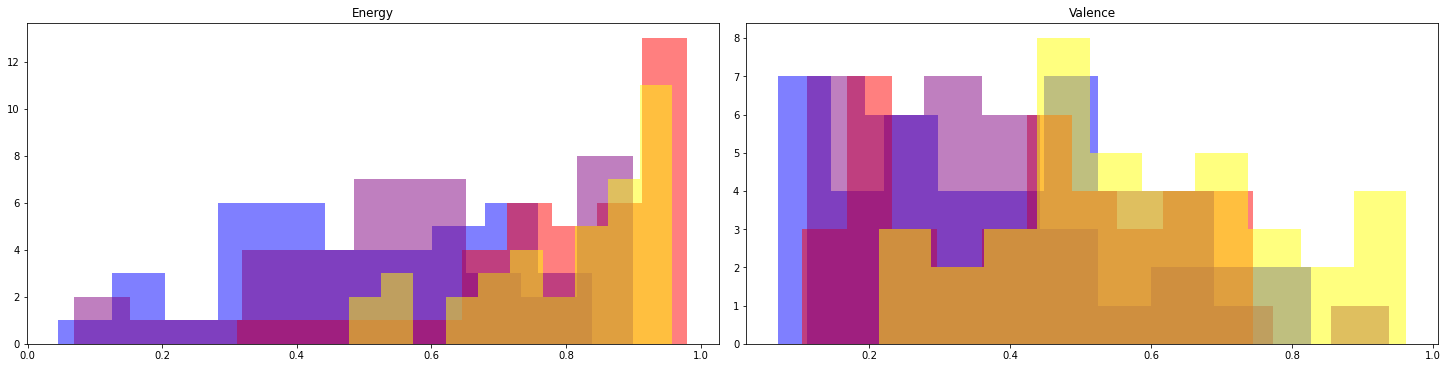

In [36]:
fig1, ax1 = plt.subplots(1, 2, layout = 'constrained', figsize = (20, 5))
ax1[0].title.set_text("Energy")
ax1[0].hist(moody_features_df['energy'], color = "blue", alpha = .5)
ax1[0].hist(angsty_features_df['energy'], color = "red", alpha = .5)
ax1[0].hist(chill_features_df['energy'], color = "purple", alpha = .5)
ax1[0].hist(upbeat_features_df['energy'], color = "yellow", alpha = .5)

ax1[1].title.set_text("Valence")
ax1[1].hist(moody_features_df['valence'], color = "blue", alpha = .5)
ax1[1].hist(angsty_features_df['valence'], color = "red", alpha = .5)
ax1[1].hist(chill_features_df['valence'], color = "purple", alpha = .5)
ax1[1].hist(upbeat_features_df['valence'], color = "yellow", alpha = .5)

<font color='darkcyan' style='font-family:calibri'>
    <p>
       I've went ahead and graphed the energy and valence values for all the playlists cumulatively to get a closer look at comparing them all. 
    </p>

<font color='darkcyan' style='font-family:calibri'>
    <p>
       Just as I suspected, there are definitely distinctive clusters of data for each category. 
        <br />
        <br />
        <strong>Valence:</strong> The "moody" and "chill" tracks tend to be grouped together on the lower end of the valence spectrum, while the "angsty" and "upbeat" tracks float more towards the middle/upper areas respectively.
        <br />
        <br />
        <strong>Energy:</strong> The "moody" and "chill" tracks tend to be grouped together on the lower end of the energy spectrum, while the "angsty" and "upbeat" tracks float more towards the middle/upper areas.
    </p>

<font color='darkcyan' style='font-family:calibri'>
    <p>
       I feel like there is definitely a trend here. The high-valence tracks seem to high-energy as well. Here I use a scatterplot to interpret the relationship between valence and energy between the tracks on each playlist.
    </p>

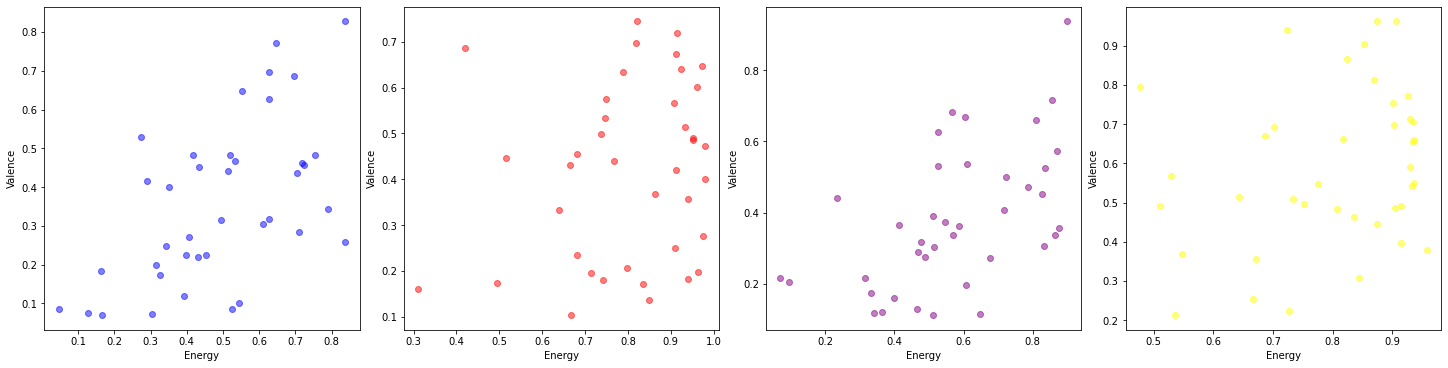

In [21]:
fig1, ax1 = plt.subplots(1,4, layout = 'constrained', figsize = (20, 5))
ax1[0].scatter(moody_features_df['energy'], moody_features_df['valence'], alpha = 0.5, color = 'blue')
ax1[0].set_xlabel ('Energy')
ax1[0].set_ylabel('Valence')

ax1[1].scatter(angsty_features_df['energy'], angsty_features_df['valence'], alpha = 0.5, color = 'red')
ax1[1].set_xlabel ('Energy')
ax1[1].set_ylabel('Valence')

ax1[2].scatter(chill_features_df['energy'], chill_features_df['valence'], alpha = 0.5, color = 'purple')
ax1[2].set_xlabel ('Energy')
ax1[2].set_ylabel('Valence')

ax1[3].scatter(upbeat_features_df['energy'], upbeat_features_df['valence'], alpha = 0.5, color = 'yellow')
ax1[3].set_xlabel ('Energy')
ax1[3].set_ylabel('Valence')

plt.show()

<font color='darkcyan' style='font-family:calibri'>
    <p>
       However, I want to be able to consider the outliers. There are actually quite a few "upbeat" songs that are low in valence, which is a feature not typically indicative of an upbeat song. Additionally, there is a fair amount of "moody" songs which are high in valence.
    </p>

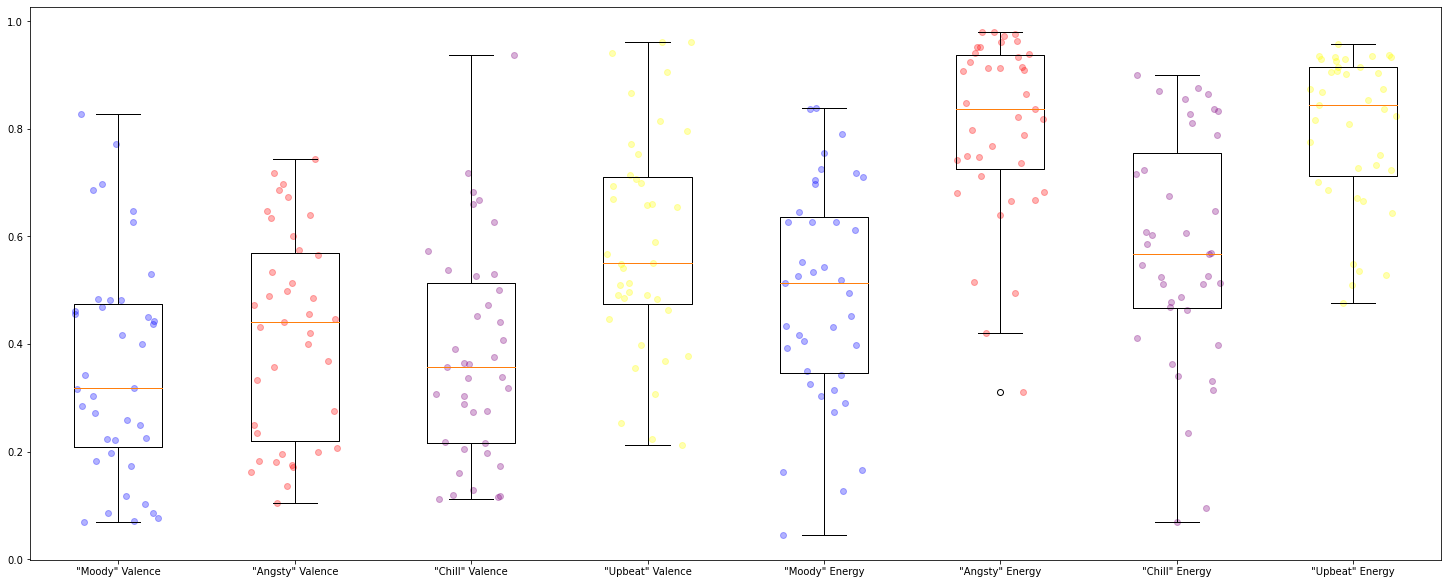

In [22]:
fig1, ax1 = plt.subplots(layout = 'constrained', figsize = (20,8))
moody_val = moody_features_df['valence']
angsty_val = angsty_features_df['valence']
chill_val = chill_features_df['valence']
upbeat_val = upbeat_features_df['valence']

moody_en = moody_features_df['energy']
angsty_en = angsty_features_df['energy']
chill_en = chill_features_df['energy']
upbeat_en = upbeat_features_df['energy']

moody_val_x = [1] * len(moody_val)
angsty_val_x = [2] * len(angsty_val)
chill_val_x = [3] * len(chill_val)
upbeat_val_x = [4] * len(upbeat_val)

moody_en_x = [5] * len(moody_en)
angsty_en_x = [6] * len(angsty_en)
chill_en_x = [7] * len(chill_en)
upbeat_en_x = [8] * len(upbeat_en)

moody_val_x_jitter = np.random.uniform(-0.25, 0.25, len(moody_val_x))
angsty_val_x_jitter = np.random.uniform(-0.25, 0.25, len(angsty_val_x))
chill_val_x_jitter = np.random.uniform(-0.25, 0.25, len(chill_val_x))
upbeat_val_x_jitter = np.random.uniform(-0.25, 0.25, len(upbeat_val_x))

moody_en_x_jitter = np.random.uniform(-0.25, 0.25, len(moody_en_x))
angsty_en_x_jitter = np.random.uniform(-0.25, 0.25, len(angsty_en_x))
chill_en_x_jitter = np.random.uniform(-0.25, 0.25, len(chill_en_x))
upbeat_en_x_jitter = np.random.uniform(-0.25, 0.25, len(upbeat_en_x))

ax1.scatter(moody_val_x + moody_val_x_jitter, moody_val, alpha = 0.3, color = 'blue', label = '"Moody" Valence')
ax1.scatter(angsty_val_x + angsty_val_x_jitter, angsty_val, alpha = 0.3, color = 'red', label = '"Angsty" Valence')
ax1.scatter(chill_val_x + chill_val_x_jitter, chill_val, alpha = 0.3, color = 'purple', label = '"Chill" Valence')
ax1.scatter(upbeat_val_x + upbeat_val_x_jitter, upbeat_val, alpha = 0.3, color = 'yellow', label = '"Upbeat" Valence')

ax1.scatter(moody_en_x + moody_en_x_jitter, moody_en, alpha = 0.3, color = 'blue', label = '"Moody" Energy')
ax1.scatter(angsty_en_x + angsty_en_x_jitter, angsty_en, alpha = 0.3, color = 'red', label = '"Angsty" Energy')
ax1.scatter(chill_en_x + chill_en_x_jitter, chill_en, alpha = 0.3, color = 'purple', label = '"Chill" Energy')
ax1.scatter(upbeat_en_x + upbeat_en_x_jitter, upbeat_en, alpha = 0.3, color = 'yellow', label = '"Upbeat" Energy')

ax1.boxplot([moody_val, angsty_val, chill_val, upbeat_val, moody_en, angsty_en, chill_en, upbeat_en])
ax1.set_xticks([1,2,3,4,5,6,7,8], ['"Moody" Valence', '"Angsty" Valence', '"Chill" Valence', '"Upbeat" Valence', '"Moody" Energy', '"Angsty" Energy', '"Chill" Energy', '"Upbeat" Energy'])

plt.show()

<font color='darkcyan' style='font-family:calibri'>
    <p>
       Through this visualization, we can analyze the trends, outliers, and averages all in one. 
        <br />
       The point of this analysis is to analyze my own listening habits to determine if human subjectivity affects my interpretations of different genres or moods of music. 
        <br/>
        <br/>
        This would ring true if songs that I labeled as "moody" were actually high in valence, as opposed to being low in valence, as one would expect from a sad song. 
        <br />
        Here, it looks like there is a standard correlation between how I interpret the moods of these songs and the emotions they are intended to evoke. 
        <br/>
        <br/>
        The songs that I feel are moody are the lowest in both valence and energy, while the ones I feel are upbeat are the most high-energy and high-valence. 
        <br />
        <em>However</em> the average valence for a song that I felt was upbeat is only around 0.5 on a scale from 0.0 to 1.0. This means that while I feel that these songs are particularly upbeat, they are actually just average.
    </p>

<font color='darkcyan' style='font-family:calibri'>
    <h2>
        The Results
    </h2>
    <p>
        Going back to my original question, based on my data, is music really just a subjective experience? Can happy songs make me sad? Can sad songs make me happy? 
        <br />
        <br />
        Absolutely, but it is unlikely. Or it is at least less likely than I thought. 
        <br />
        <br />
        At first I figured that all of my music (regardless of each "mood" I categorized it as) would contain the same stats, or at least very similar stats. I originally thought that my understandings and relationships with the music that I liked was just based on my own perceptions of and attachments to the songs that I like to listen to. 
        <br />
        While that is definitely the case with some of the music here (like the outliers on for each category) there aren't nearly as many outliers as I expected, and the averages ring true to what would be expected of these categories of music. 
        <br />
        <br />
        This was surpising because I feel like I tend to stick to only a few genres of music that are just generally pretty moody and angsty. I had figured that this would mean that no matter what, all my music is low in valence. This is true to an extent, seeing as how my average "upbeat" valence is a very middle of the road value, but it is still notably higher than the other categories. 
    </p>
</font>

<font color='darkcyan' style='font-family:calibri'>
    <h2>
        The Limitations
    </h2>
    <p>
        Now that I have completed my analysis, I do feel that there are some limitations with my data. 
        <br/>
        <br/>
        The biggest limitation is the depth of my data. Of course, I really wanted to analyze my own listening habits, but I wonder what this project would look like on somebody who listens to a wider variety of music. 
        <br/>
        I also can't help but think about what work could be done with dividing them up into genres instead of moods. Certain genres have distinctive scenes to them (such as emo, pop, etc.) so it would also be interesting to see the genres of these songs and how they contribute to their "scene" and if that scene is just a product of the musical composition or the culture surrounding it. 
        <br/>
        <br/>
        I also think it would be neat if Spotify did something to generate playlists for users based off of the moods of the tracks they listen to. I think if I analyzed something that was generated by Spotify, rather than something man-made, I could get some interesting results.
    </p>
</font>

<font color='darkcyan' style='font-family:calibri'>
    <h2>
        The Conclusion
    </h2>
    <p>
        Anybody can have certain emotional attachments to songs that can evoke a certain mood. For example, somebody could listen to a super upbeat and romantic love song, but experience feelings of sadness because of it instead of the mood that the artist intended. 
        <br/>
        <br/>
        Thankfully, through analyzing my own Spotify data, I learned that these instances are few and far between. However, it is interesting to analyze the different relationships that I have with my music. The same music that makes me relaxed could very well get another person pumped up. 
        <br/>
        <br/>However, at the end of the day, I am just a normal guy. I experience feelings and music just like anybody else. So while I'll be weird sometimes and listen to <em>The Front Bottoms</em> to lift my spirits, I'll also indulge in more typical sounds like Pop and Jazz and get the same effect. 
        <br/>
        <br/>
        Music is a subjective experience, but not nearly as subjective as I thought. 
    </p>
</font>